### Step 3: Data Visualization

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset 
df_clean = pd.read_csv("../data/df_clean.csv")
df_clean['price'] = df_clean['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [10]:
# 1. Average Price per Neighborhood
avg_price = df_clean.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

# 2. Average Accommodates per Neighborhood
avg_accom = df_clean.groupby('neighbourhood_cleansed')['accommodates'].mean().sort_values(ascending=False)

# 3. Average Cleanliness Score
avg_cleanliness = df_clean.groupby('neighbourhood_cleansed')['review_scores_cleanliness'].mean().sort_values(ascending=False)

# 4. Average Number of Reviews
avg_reviews = df_clean.groupby('neighbourhood_cleansed')['number_of_reviews'].mean().sort_values(ascending=False)

# 5. Count of Entire Home Listings
entire_home_counts = df_clean[df_clean['room_type'] == 'Entire home/apt'] \
    .groupby('neighbourhood_cleansed').size().sort_values(ascending=False)

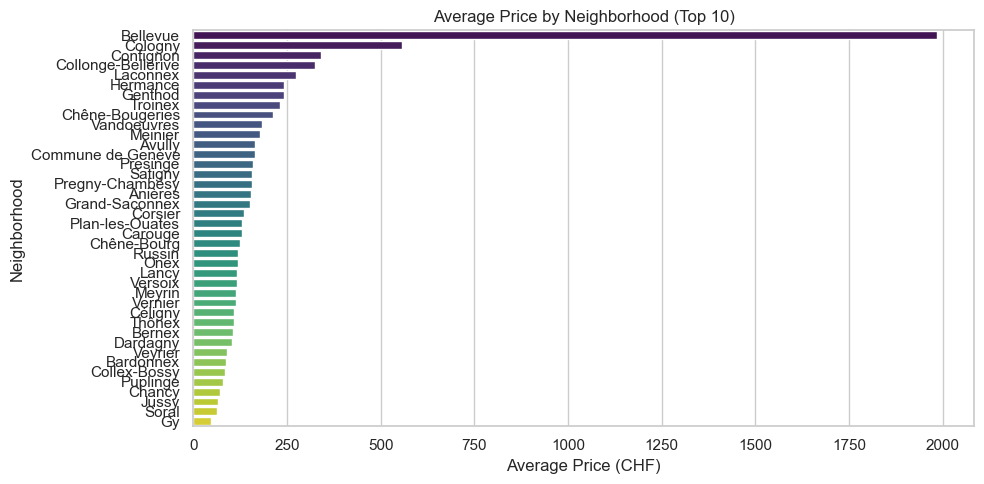

In [11]:
avg_price_df = avg_price.reset_index()
avg_price_df.columns = ['neighbourhood', 'avg_price']

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_price_df, x='avg_price', y='neighbourhood', palette='viridis', hue='neighbourhood', dodge=False, legend=False)
plt.title("Average Price by Neighborhood (Top 10)")
plt.xlabel("Average Price (CHF)")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()

#### Observations

The bar chart displays the average price by neighborhood. This plot highlighted how dramatically prices vary across regions. Bellevue stood out as the most expensive area, with average prices significantly higher than all others—possibly due to a combination of location, luxury listings, or limited supply. Cologny and Confignon followed with relatively high prices as well, suggesting a cluster of premium markets.

These variations in pricing immediately offered insight into Geneva’s regional market segmentation. Certain neighborhoods appear to cater to high-end travelers, while others offer more budget-friendly or mid-range accommodations. This plot helped us identify hotspots of premium listings, which will be useful context for later predictive modeling steps involving price.

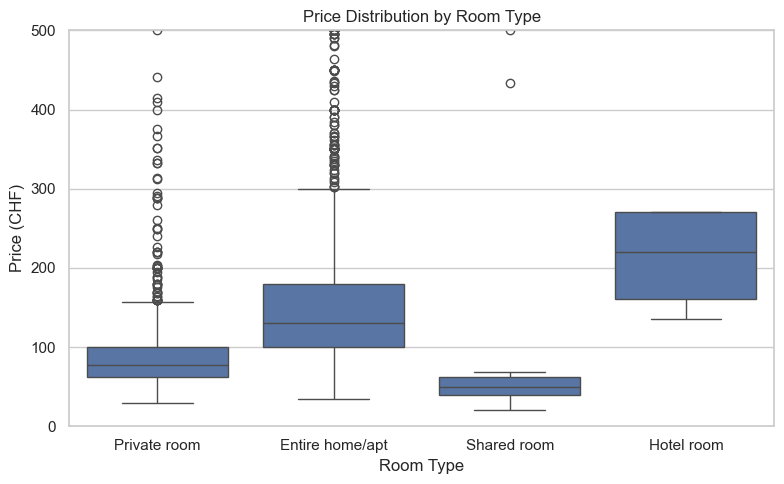

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='room_type', y='price', data=df_clean)
plt.ylim(0, 500)  # To reduce outliers' effect
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price (CHF)")
plt.tight_layout()
plt.show()

#### Observations

The second visualization explored how prices vary by room type using a boxplot. This plot highlighted that **entire homes/apartments** generally commanded the highest prices with a wider range, while **private rooms** had a tighter, lower distribution. **Shared rooms** showed consistently low prices with minimal variability, as expected. Interestingly, **hotel rooms** displayed high price medians but also a smaller sample size, making them less consistent. 

This comparison helped us understand how room category affects pricing strategy. Hosts offering entire properties can command higher fees, possibly due to the added privacy and amenities, while those offering shared or private rooms cater to more budget-conscious travelers. This distinction will be important for our pricing model, especially in identifying what drives high-value bookings.

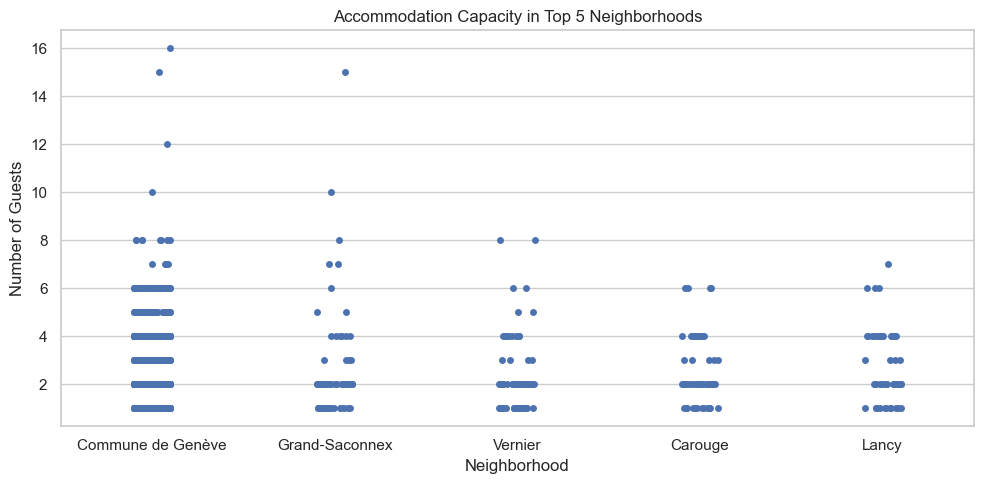

In [14]:
top_neighs = df_clean['neighbourhood_cleansed'].value_counts().head(5).index
subset = df_clean[df_clean['neighbourhood_cleansed'].isin(top_neighs)]

plt.figure(figsize=(10, 5))
sns.stripplot(x='neighbourhood_cleansed', y='accommodates', data=subset, jitter=True)
plt.title("Accommodation Capacity in Top 5 Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Guests")
plt.tight_layout()
plt.show()

#### Observations

The third visualization focused on how accommodation capacity varies across the five most common neighborhoods. We used a strip plot to display the number of guests listings could accommodate in each area. Commune de Genève showed the widest range, with several listings hosting more than 10 guests — likely larger apartments or entire homes catering to families or groups. In contrast, neighborhoods like Lancy and Carouge tended to cluster around smaller capacities, primarily between 2–4 guests.

This plot helped us identify where more group-oriented or family-friendly listings might be concentrated. It also highlighted potential zoning or space differences between neighborhoods, which can influence listing size. These observations will be useful when we later cluster listings or classify amenities based on space.

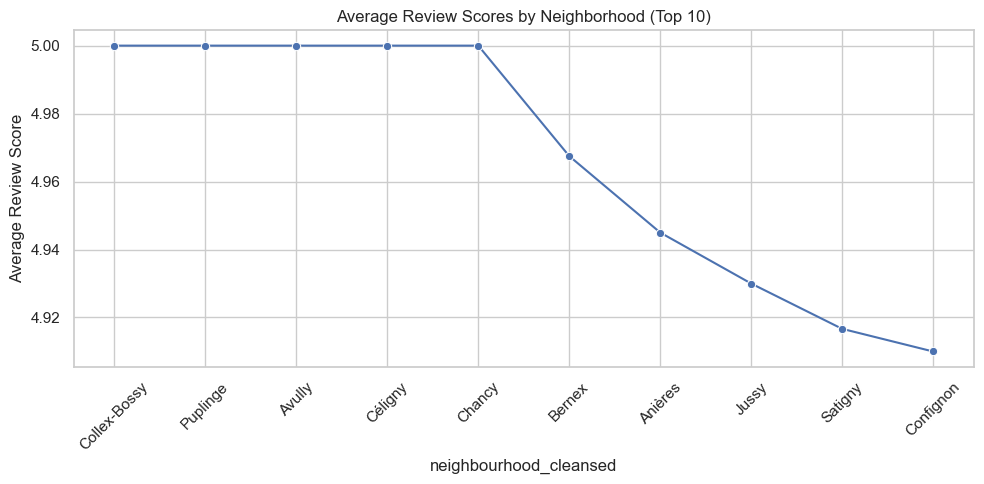

In [15]:
avg_review = df_clean.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.lineplot(x=avg_review.index, y=avg_review.values, marker='o')
plt.title("Average Review Scores by Neighborhood (Top 10)")
plt.xticks(rotation=45)
plt.ylabel("Average Review Score")
plt.tight_layout()
plt.show()

#### Observations 

The fourth visualization illustrated average review scores across the top ten highest-rated neighborhoods using a line plot. Interestingly, the top five neighborhoods — including Collex-Bossy, Puplinge, Avully, Céligny, and Chancy — all had perfect average scores of 5.0. This suggests a strong guest satisfaction trend in these areas, possibly due to attentive hosts, higher-end properties, or quieter, more residential settings.

As the plot moves down to neighborhoods like Jussy and Confignon, we begin to see slight drops in ratings, although still within a high range (above 4.9). While the variation is minimal, it still provides useful insight into how guest experiences may differ slightly depending on location. These trends can later be useful in classification modeling, particularly when working with review-related target variables.

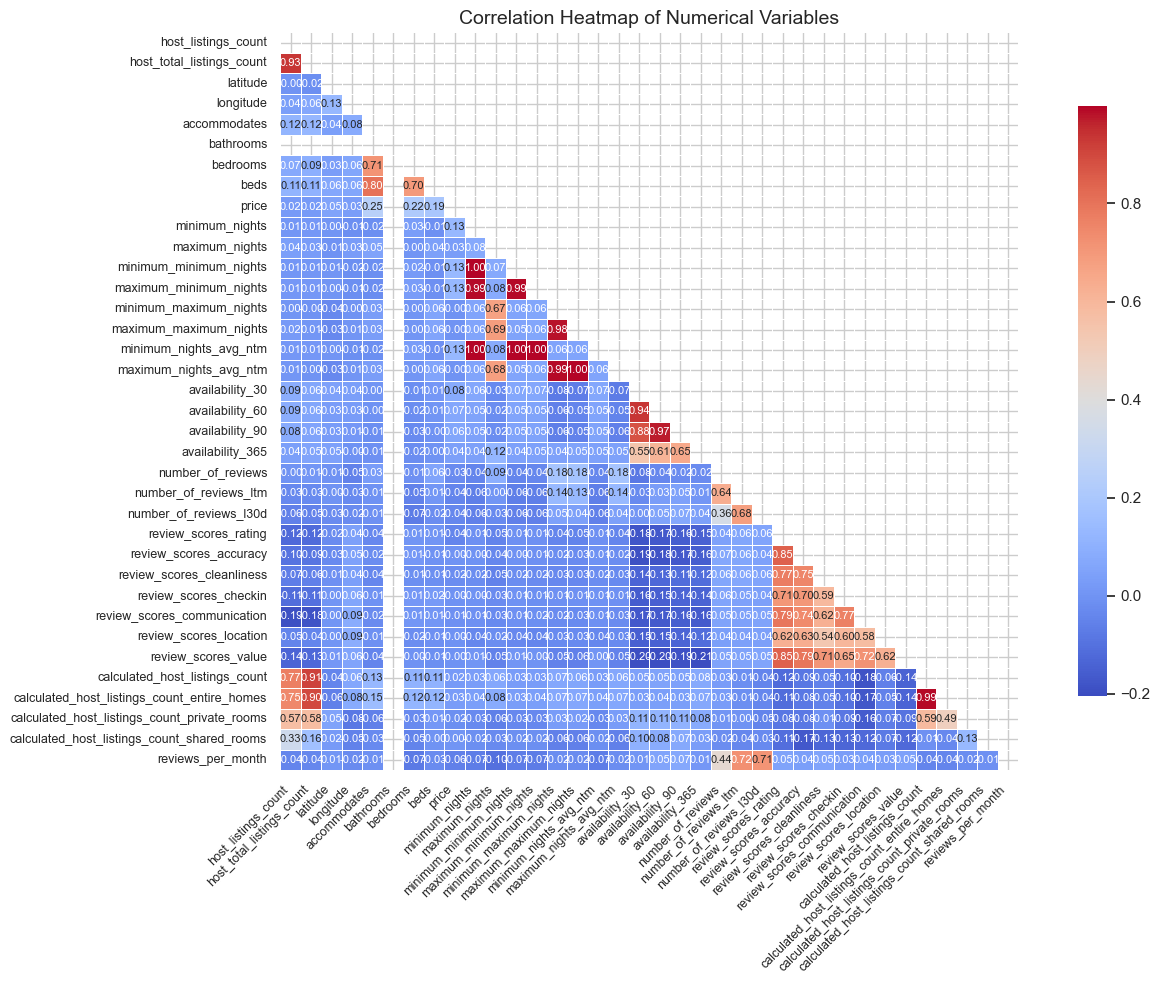

In [16]:
# Select numeric features only and drop ID-like columns
numerics = df_clean.select_dtypes(include='number').drop(columns=['id', 'scrape_id', 'host_id'])
corr = numerics.corr()

# Create mask to hide upper triangle (for cleaner look)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the plot
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr, 
    mask=mask, 
    cmap='coolwarm', 
    annot=True, 
    fmt=".2f", 
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True,
    annot_kws={"size": 8}
)

plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

#### Observations

The fifth visualization presented a cleaned-up correlation heatmap, showing relationships between all numerical variables in the dataset. We excluded ID-like fields and focused only on interpretable, meaningful columns. Strong positive correlations were observed between variables like `beds`, `bedrooms`, and `accommodates`, which makes intuitive sense as larger listings typically offer more of each. Availability variables also showed strong internal correlation across different time frames (30, 60, 90, 365 days).

Interestingly, we found relatively weak correlation between `price` and most review-related scores, suggesting that guest satisfaction does not necessarily depend on how expensive a listing is. This visualization helped us quickly identify multicollinearity risks for modeling and provided a useful high-level view of how features interact within the dataset. We'll be using this as a reference when selecting predictors for regression and classification models later in the project.

### Final Observations

To explore patterns across Geneva’s Airbnb landscape, we created five distinct visualizations—each designed to highlight a different aspect of the dataset. A bar plot of average prices by neighborhood revealed striking regional differences, with Bellevue and Cologny emerging as premium-priced areas. A boxplot comparing room types confirmed expected trends, such as entire homes commanding higher prices and shared rooms remaining the most affordable. To explore listing capacity, we used a strip plot focused on the top five neighborhoods, which showed that Commune de Genève consistently offered the widest range of guest accommodations.

We then used a line plot to examine average review scores across neighborhoods. Several lesser-known areas like Collex-Bossy and Puplinge had perfect scores, suggesting strong guest satisfaction despite having fewer listings. Finally, a correlation heatmap helped us identify key relationships between numerical variables—most notably strong correlations among space-related variables like `beds`, `bedrooms`, and `accommodates`, and minimal correlation between price and guest satisfaction. Together, these visualizations gave us a well-rounded understanding of how pricing, location, room type, and listing characteristics vary across Geneva, offering valuable insight to guide our modeling choices in the next phases.